**Import Libreries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [ ]:
mnist = tf.keras.datasets.mnist ## this is basically handwritten characters based on 28x28 sized images of 0 to 9

**Load and preprocess the dataset**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

**Build the CNN model**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

**Compile the model**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Train the model**

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 65s 68ms/step - loss: 0.1850 - accuracy: 0.9428 - val_loss: 0.0462 - val_accuracy: 0.9851
Epoch 2/10
938/938 [==============================] - 63s 67ms/step - loss: 0.0484 - accuracy: 0.9853 - val_loss: 0.0339 - val_accuracy: 0.9893
Epoch 3/10
938/938 [==============================] - 64s 68ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0360 - val_accuracy: 0.9881
Epoch 4/10
938/938 [==============================] - 64s 69ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0300 - val_accuracy: 0.9900
Epoch 5/10
938/938 [==============================] - 65s 70ms/step - loss: 0.0214 - accuracy: 0.9932 - val_loss: 0.0264 - val_accuracy: 0.9921
Epoch 6/10
938/938 [==============================] - 68s 72ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0300 - val_accuracy: 0.9910
Epoch 7/10
938/938 [==============================] - 69s 74ms/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0298 - val_accuracy:

**Evaluate the model**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 10ms/step - loss: 2.2990 - accuracy: 0.0924
Test accuracy: 0.09239999949932098


**Plot training history**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(1, len(acc) + 1)

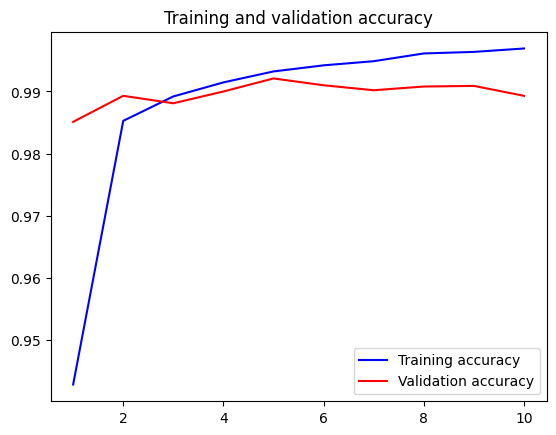

In [ ]:
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

In [ ]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

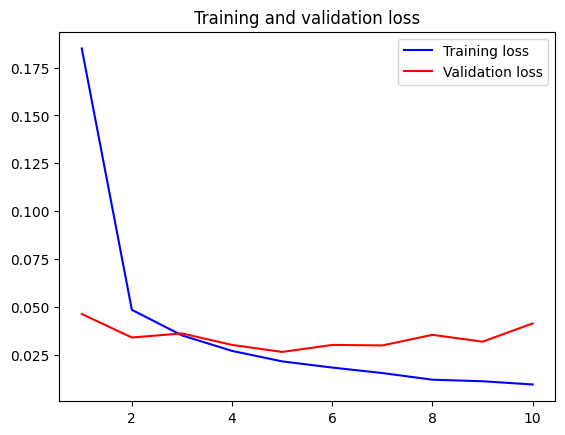

In [ ]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
plt.show()

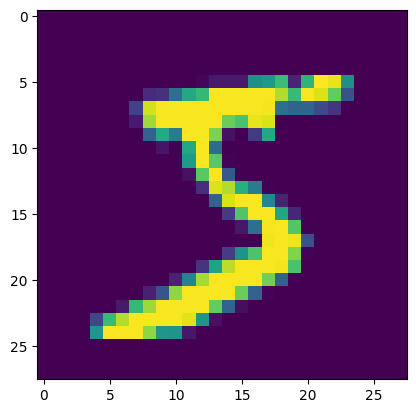

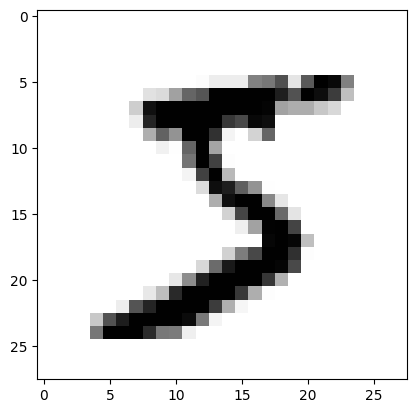

In [ ]:
##checking the graph, how the data looks like
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
## in order to execute the graph it is unknown whether it is color or binary
## image so in order to plot it the configuration has been changed.
plt.show()
plt.imshow(train_images[0], cmap = plt.cm.binary)

In [ ]:
import cv2 ## pip install opencv-python


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

uploaded = files.upload()

# Choose the image file name you uploaded
image_filename = 'Three.jpg'  # Replace with your image file name


Saving Three.jpg to Three (2).jpg


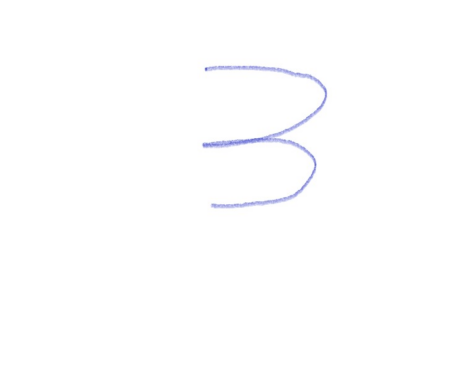

In [ ]:
image = cv2.imread(image_filename)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


In [ ]:
img.shape

(599, 710, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(599, 710)

In [ ]:
resized = cv2.resize(gray, (28,28),interpolation = cv2.INTER_AREA)
resized.shape

(28, 28)

In [ ]:
import numpy as np # pip install numpy
IMG_SIZE = 28
newimg = tf.keras.utils.normalize (resized, axis = 1) ## 0 to 1 scaling
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1) # kernel operation of convolution layer
newimg.shape

(1, 28, 28, 1)

In [ ]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 25ms/step


In [ ]:
print(np.argmax(predictions))

3
